### <a id='overview'>1. Overview</a>

- **Goal**: To compare various models' performance (ML vs. BERT) on the classic spam vs ham message dataset *with or without* the technique of over-/under- sampling and Easy Data Augmentation [EDA](https://github.com/jasonwei20/eda_nlp)
- **Take away**: 
  - For ML models, oversampling with EDA in svc yields the best f1 score (**~.83**) compared to the best-performing NB without EDA (**~.72**) 
  - Even with under sampling, BERT achieved f1 scores **>.95**.  With the implementation of EDA, f1 **>.99**.
  - EDA appears to be a valuable resource for text classification
 


##### Performance of BERT with EDA on spam classification 
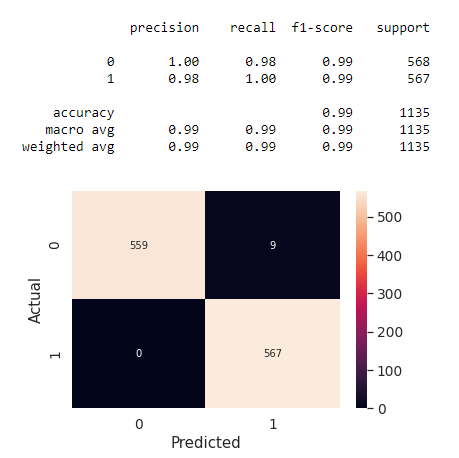

#### Technique / libraries used
- Key libraries: sklearn, nltk, tensorflow, imblearn
- Word embedding: Bag of words, TF-IDF
- Deep learning: BERT
- Overfit prevention in deep learning: EarlyStopping, Dropout
- Sampling: oversampling, undersampling

#### References
- EDA: Easy Data Augmentation Techniques for Boosting Performance on Text Classification Tasks ([paper](https://arxiv.org/abs/1901.11196)) ([repo](https://github.com/jasonwei20/eda_nlp))
- Contextual Augmentation: Data Augmentation by Words with Paradigmatic Relations ([paper](https://arxiv.org/abs/1805.06201)) ([repo](https://github.com/pfnet-research/contextual_augmentation))

### <a id='sam'>2. About the author: Kam Leung Yeung (Sam)</a>

* PhD in Cognitive Psychology, Iowa State University in Ames, Iowa, USA

**Social media**:

* [LinkedIn](https://www.linkedin.com/in/kamleungyeung/)
* [Google Scholar](https://scholar.google.com/citations?user=OwUmaN8AAAAJ)
* [GitHub](https://github.com/k-l-yeung)
* [Tableau](https://public.tableau.com/app/profile/kam.leung.yeung#!/)


**Data source**
- [SMS Spam collection Data Set](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection#)

### <a id='toc'>3. Table of content</a>

1. <a href='#overview'>Overview</a>  
2. <a href='#sam'>About the author: Kam Leung Yeung (Sam)</a> 
3. <a href='#toc'>Table of content</a> 
4. <a href='#rd'>Read data</a>  
5. <a href='#de'>Data exploration</a>  
 - <a href='#wc'>Word clouds of ham and spam texts</a>  
6. <a href='#p'>Preprocessing</a>  
8. <a href='#hid'>Handling imbalanced data</a>  
7. <a href='#fe'>Feature Engineering</a>
9. <a href='#bc'>Build classifiers</a>  
10. <a href='#cp'>Check performance</a>  
10. <a href='#pml'><b>Performance of various ML models</b></a>  
11. <a href='#easy'>Easy data augmentation (EDA) implementation </a>  
12. <a href='#best'><b>Best ML model's</b> confusion matrix, ROC, precision-recall curve</a>  
11. <a href='#mp'>Make prediction</a>  
12. <a href='#sm'>Save models</a>  
16. <a href='#bert'>BERT</a>
  - <a href='#dbm'>Define the BERT model</a>
  - <a href='#ceda'>Compare BERT models with or without EDA</a>
  - <a href='#pberteda'><b>Performance of BERT with EDA. f1 = .99</b></a>
 
 



### <a id='rd'>Read data</a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import plotly.express as px
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import seaborn as sns

from sklearn.datasets import make_classification
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
#from matplotlib import pyplot

import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,train_test_split,StratifiedKFold,cross_val_score,learning_curve
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, auc, precision_recall_curve, roc_auc_score, roc_curve, confusion_matrix

from sklearn.pipeline import Pipeline

import tensorflow as tf
import pickle

import pandas as pd
import numpy as np
import csv

import nltk
nltk.download("punkt")
# nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from string import punctuation
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

import time


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\siu_s\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv('smsspamcollection\SMSSpamCollection.txt', sep = '\t',encoding='latin-1', header = None)
df.head(3)

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [3]:
# change cols to more descriptive names
df = df.rename(columns={1 : "text", 0:"label"})
# add a numerical col for classification
df['class'] = df[['label']].apply(lambda x:  1 if x[0]=='spam' else 0,axis=1)
df.head(3)

,label,text,class
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1


<a href='#toc'>Back to table of content</a>

### <a id='de'>Data Exploration</a>

In [4]:
# check missing data
df.isna().sum()

label    0
text     0
class    0
dtype: int64

In [5]:
df.shape

(5572, 3)

In [6]:
#show both spam and ham text
display(df[df['label']=='spam'].head(5))
df[df['label']=='ham'].head(5)

,label,text,class
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",1


,label,text,class
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
6,ham,Even my brother is not like to speak with me. ...,0


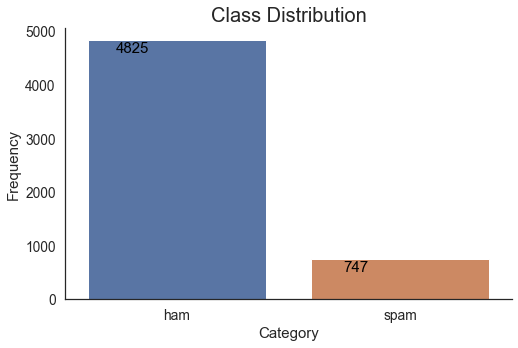

In [7]:
# show class distribution

sns.set(font_scale = 1.25) # size of fonts
sns.set_style('white')
plt.rcParams["figure.figsize"] = [8, 5]

ax = sns.countplot(x="label", data=df)
ax.set_title('Class Distribution', fontsize=20)
ax.set_xlabel("Category") # x-axis label
ax.set_ylabel("Frequency") # y-axis label
ax.spines["right"].set_visible(False) # remove the top border
ax.spines["top"].set_visible(False) # remove the right border
for p in ax.patches: # add value on each bar
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='center', color='black', size=15)
plt.show()

In [8]:
# ratio of the 2 classes
4827/747

6.461847389558233

Imbalanced class.  Indeed the ratio is almost 6.5:1

In [9]:
# Gather all text in the text column
all_words = ''
for row in df['text']: # for each row in the 'text' column
    msg = row.lower() # make it lower case
    tokens = nltk.word_tokenize(msg) # separate long text into separate words as a list
    for words in tokens:
        all_words = all_words + words + ' ' # append words into existing words

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


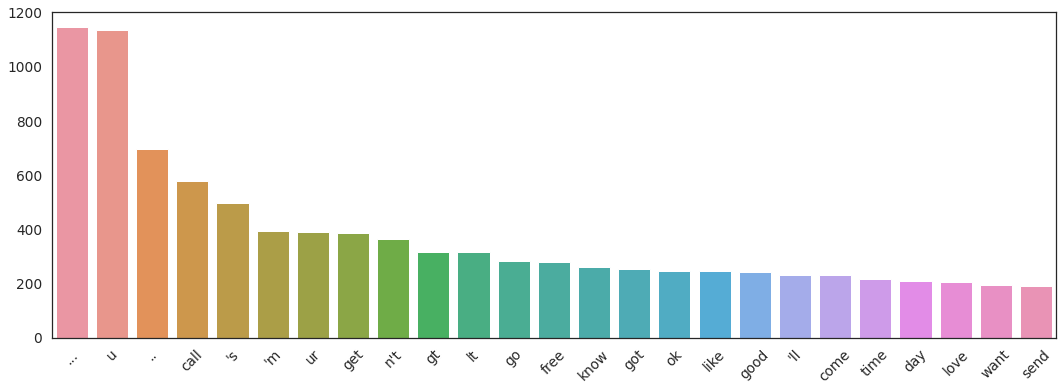

In [10]:
tokens = all_words.split()
remove_these = set(stopwords.words('english') + list(string.punctuation) + list(string.digits))
filtered_text = [w for w in tokens if not w in remove_these]

part_fdist = nltk.FreqDist(filtered_text).most_common(25) # 25 most common tokens
part_fdist = pd.Series(dict(part_fdist)) # convert dict to pd series

font = {'family' : 'normal', 'weight' : 'regular', 'size'   : 12}
plt.rc('font', **font)
fig, ax = plt.subplots(figsize=(18,6))
plt.xticks(rotation=45);
all_plot = sns.barplot(x=part_fdist.index, y=part_fdist.values, ax=ax)


#### <a id='wc'>Word cloud</a>

In [11]:
ham_words = ''
spam_words = ''

In [12]:
# Creating a corpus of spam messages
for val in df[df['label'] == 'spam']['text']:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        spam_words = spam_words + words + ' '

# Creating a corpus of ham messages
for val in df[df['label'] == 'ham'].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        ham_words = ham_words + words + ' '

In [13]:
# print first 100 characters of spam and ham words
print(spam_words[:100], '\n', ham_words[:100], '\n')
print("spam has", len(spam_words.split()), "words")
print("ham has", len(ham_words.split()), "words")

free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entr 
 go until jurong point , crazy .. available only in bugis n great world la e buffet ... cine there go 

spam has 20806 words
ham has 83896 words


In [14]:
stopwords = set(stopwords.words('english'))
cloud_mask = np.array(Image.open('./cloud_mask/cloud.jpg')) 
wc=WordCloud(width=500, height=300, background_color ='white', max_words=150, \
             max_font_size=80, stopwords = stopwords, mask = cloud_mask)
wc.generate(spam_words)
# ham_wordcloud = wc.generate(ham_words)

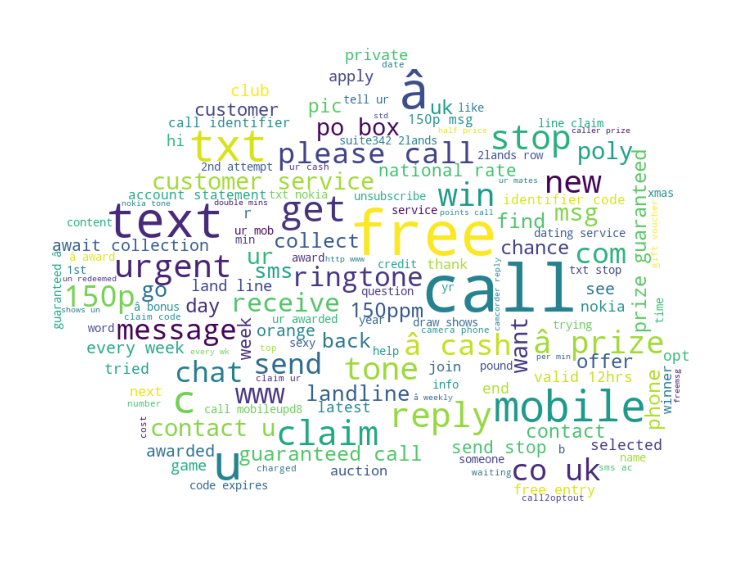

In [15]:
# Word cloud with spam words
plt.figure( figsize=(10,8), facecolor='w')
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

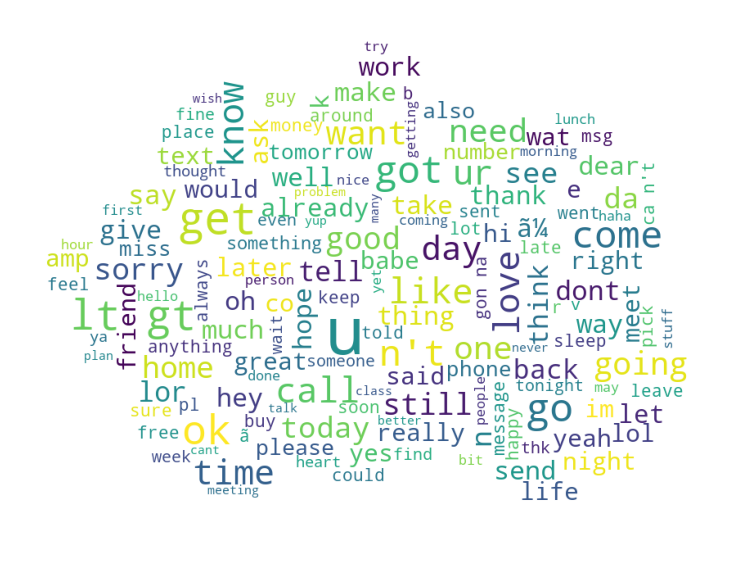

In [16]:
# Word cloud with ham words
wc.generate(ham_words)
plt.figure( figsize=(10,8), facecolor='w')
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

<a href='#toc'>Back to table of content</a>

### <a id='p'>Preprocessing </a>

In [17]:
# create stemmer, lemmatizer and a list of stopwords that also include punctuation
from nltk.corpus import stopwords
PS = nltk.stem.porter.PorterStemmer()
lemmatizer = nltk.stem.wordnet.WordNetLemmatizer()
# create a list with stopwords and punctuations
stopwords = set(stopwords.words('english')) # set() is required to combine punctuation in union
stopwords = list(stopwords.union(set(punctuation))) # use list() to comvert to a list from a set 

In [18]:
def pre_process(line: str) ->str:
    # tokenize and lower() 
    tokens = tf.keras.preprocessing.text.text_to_word_sequence(line, lower=True, split=' ')
    # remove stop words and punctuations
    tokens = [word for word in tokens if word not in stopwords]

    # stemming
    # PS stemmer will change text lower case
    tokens = [PS.stem(word) for word in tokens] # require an input of a list of tokens
    # OPTIONAL lemmatizer
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return ' '.join(tokens)

<a href='#toc'>Back to table of content</a>

### <a id='hid'>Handling imbalanced data</a>

In [19]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy="not majority") # String

# over sample rare class or under sample abundant class
def under_over_sample(df, y, method):
    if method == 'under':
        X_rus, y_rus = rus.fit_resample(df, y)
        print('X_rus shape is: ', str(X_rus.shape))
        print('y_rus shape is: ', str(y_rus.shape), '\n')
        return X_rus, y_rus
    elif method == 'over':
        X_ros, y_ros = ros.fit_resample(df, y)
        print('X_ros shape is: ', str(X_ros.shape))
        print('y_ros shape is: ', str(y_ros.shape), '\n')
        return X_ros, y_ros

In [20]:
# split the data into training and testing sets
def split(X, y, test_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, \
                                                    random_state=111, stratify = y)
    print("X shape: ", str(X.shape))
    print("X_train shape: ", str(X_train.shape))
    print("X_test shape: ", str(X_test.shape))
    print("y_train shape: ", str(y_train.shape))
    print("y_test shape: ", str(y_test.shape),'\n')
    
    return X_train, X_test, y_train, y_test

### <a id='fe'>Feature Engineering: Convert words to vectors </a>

In [21]:
#convert the text df into vectors
def vectorize(X_train, max_features, kind="tfidf"):
    if kind == "tfidf":
        vectorizer = TfidfVectorizer(max_features=max_features, ngram_range=(1,2))
        print('tfidf is used with ', str(max_features), ' of features')
    else:
        vectorizer = feature_extraction.text.CountVectorizer(max_features=max_features, ngram_range=(1,2))
        print('BoW is used with ', str(max_features), ' of features')
    return vectorizer.fit_transform(X_train)

<a href='#toc'>Back to table of content</a>

### <a id='bc'>Build classifiers </a>

In [22]:
# create instances of various classifier 
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)
abc = AdaBoostClassifier(n_estimators=100)

In [23]:
#create a dictionary of variables and models
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc, 'ABC': abc}

In [24]:
#fit the df onto the models
def train(clf, features, targets):
    clf.fit(features, targets)

def predict(clf, features):
    return (clf.predict(features))

<a href='#toc'>Back to table of content</a>

### <a id='cp'>Check performance </a>

In [25]:
def check_performance(X_train_v, y_train, X_test_v, y_test):
    pred_scores_word_vectors = []
    f1= []
    # loop through the model name and the model in the dictionary clfs
    for k,v in clfs.items(): 
        train(v, X_train_v, y_train) # v is the model. train() is customized function
        pred = predict(v, X_test_v)
        # save the accuracy score for each model
        pred_scores_word_vectors.append((k, accuracy_score(y_test , pred))) 
        f1.append((k, metrics.f1_score(y_test , pred)))        
    
    # make plots of various classifiers
    # prepare data for plotting accuracy and f1
    dfp1 = pd.DataFrame(f1)
    dfp1 = dfp1.rename(columns={1 : "value", 0:"model"})
    dfp1['type'] = 'f1'

    dfp2 = pd.DataFrame()
    dfp2 = pd.DataFrame(pred_scores_word_vectors)
    dfp2 = dfp2.rename(columns={1 : "value", 0:"model"})
    dfp2['type'] = 'accuracy'

    dfp3 = pd.DataFrame()
    dfp3 = pd.concat([dfp1, dfp2])
    dfp3    

    fig = px.bar(dfp3, y='value', x='model', color='type', barmode='group',\
                 text_auto='.3', title="f1 and accuracy score on various model")
    fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
    # fig.update_xaxes(range=[0,100])
    fig.update_yaxes(range=[0,1.25],  tickvals =  [0, .25, .5, .75, 1])
    fig.show()

<a href='#toc'>Back to table of content</a>

#### Common steps for all classification task (MLs or BERT)

In [26]:
# preprocess
df['processed']=df['text'].apply(pre_process)
df.head(3)

,label,text,class,processed
0,ham,"Go until jurong point, crazy.. Available only ...",0,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,0,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entri 2 wkli comp win fa cup final tkt 21...


In [27]:
# possible parameters
over_token = [5000, 7000, 9000, 11000, 13000]
under_token = [2000, 3000, 4000, 5000]

<a href='#toc'>Back to table of content</a>

#### Main function

In [28]:
def main(sampling_m, max_token, df, vec_kind='tfidf'):
    
    print("----------------------------------------------")
    print("For ", sampling_m, "sampling method with ", str(max_token), "tokens")
    print("----------------------------------------------", '\n')
    
    # over or under sample
    sampled_df, y = under_over_sample(df, df['class'], sampling_m)

    # vectorized data
    for i in max_token:
        # split data
        X_train, X_test, y_train, y_test = split(sampled_df['processed'], y, 0.25)
        X_train = vectorize(X_train, i, kind = vec_kind)
        X_test = vectorize(X_test, i, kind =vec_kind)
        check_performance(X_train, y_train, X_test, y_test)

### <a id='pml'>Performance of various ML models</a>

Quite a few trial and errors on the number of features used were conducted and the results not shown here.  
The final test range between 4000 and 4200 is a result of that.

Also worth mention is that BoW significantly perform worse than Tf-idf, so their results are not also not shown

In [29]:
main('over', [4025, 4050, 4075, 4100, 4125, 4150,4175], df)

----------------------------------------------
For  over sampling method with  [4025, 4050, 4075, 4100, 4125, 4150, 4175] tokens
----------------------------------------------
X_ros shape is:  (9650, 4)
y_ros shape is:  (9650,)
X shape:  (9650,)
X_train shape:  (7237,)
X_test shape:  (2413,)
y_train shape:  (7237,)
y_test shape:  (2413,) 

tfidf is used with  4025  of features
tfidf is used with  4025  of features


X shape:  (9650,)
X_train shape:  (7237,)
X_test shape:  (2413,)
y_train shape:  (7237,)
y_test shape:  (2413,) 

tfidf is used with  4050  of features
tfidf is used with  4050  of features


X shape:  (9650,)
X_train shape:  (7237,)
X_test shape:  (2413,)
y_train shape:  (7237,)
y_test shape:  (2413,) 

tfidf is used with  4075  of features
tfidf is used with  4075  of features


X shape:  (9650,)
X_train shape:  (7237,)
X_test shape:  (2413,)
y_train shape:  (7237,)
y_test shape:  (2413,) 

tfidf is used with  4100  of features
tfidf is used with  4100  of features


X shape:  (9650,)
X_train shape:  (7237,)
X_test shape:  (2413,)
y_train shape:  (7237,)
y_test shape:  (2413,) 

tfidf is used with  4125  of features
tfidf is used with  4125  of features


X shape:  (9650,)
X_train shape:  (7237,)
X_test shape:  (2413,)
y_train shape:  (7237,)
y_test shape:  (2413,) 

tfidf is used with  4150  of features
tfidf is used with  4150  of features


X shape:  (9650,)
X_train shape:  (7237,)
X_test shape:  (2413,)
y_train shape:  (7237,)
y_test shape:  (2413,) 

tfidf is used with  4175  of features
tfidf is used with  4175  of features


The best f1 is .723 with NB when 4175 features were used

<a href='#toc'>Back to table of content</a>

### <a id='easy'>Easy data augmentation implementation</a>

In [30]:
df.head(3)

,label,text,class,processed
0,ham,"Go until jurong point, crazy.. Available only ...",0,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,0,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entri 2 wkli comp win fa cup final tkt 21...


In [71]:
# prepare a data file for EDA, which augment the original data 
df2 = df[['class','text']]
df2.head(3)

,class,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


In [72]:
# export the original df as text
df2.to_csv('temp.txt', sep='\t', index=False,  header=False)

Original df is augmented in the conda command prompt.  See how from the author's github [page](https://github.com/jasonwei20/eda_nlp)

In [33]:
# import the augmented df
df_eda = pd.read_csv('eda_temp.txt', sep='\t', header=None)
df_eda.head()

,0,1
0,0,go until jurong point crazy available only in ...
1,0,go until jurong point crazy available only in ...
2,0,go until jurong point crazy available only in ...
3,0,go until buffet point crazy available only in ...
4,0,go until jurong aim crazy available only in bu...


In [34]:
# before and after EDA
display(df.shape)
df_eda.shape

(5572, 4)

(16120, 2)

There are almost 3x as much data compared to the original dataset

In [35]:
# rename col
df_eda = df_eda.rename(columns={1 : "text", 0:"class"})
df_eda['processed']=df_eda['text'].apply(pre_process)
df_eda.head(3)

,class,text,processed
0,0,go until jurong point crazy available only in ...,go jurong point crazi avail bugi n great world...
1,0,go until jurong point crazy available only in ...,go jurong point crazi avail bugi n great world...
2,0,go until jurong point crazy available only in ...,go jurong point crazi avail bugi n great world...


main('over', over_token, df_eda)

main('over', [4025, 4050, 4075, 4100, 4125, 4150,4175], df_eda, 'bow') # with bag of words

In [36]:
main('over', [4025, 4050, 4075, 4100, 4125, 4150,4175], df_eda)

----------------------------------------------
For  over sampling method with  [4025, 4050, 4075, 4100, 4125, 4150, 4175] tokens
----------------------------------------------
X_ros shape is:  (27700, 3)
y_ros shape is:  (27700,)
X shape:  (27700,)
X_train shape:  (20775,)
X_test shape:  (6925,)
y_train shape:  (20775,)
y_test shape:  (6925,) 

tfidf is used with  4025  of features
tfidf is used with  4025  of features


X shape:  (27700,)
X_train shape:  (20775,)
X_test shape:  (6925,)
y_train shape:  (20775,)
y_test shape:  (6925,) 

tfidf is used with  4050  of features
tfidf is used with  4050  of features


X shape:  (27700,)
X_train shape:  (20775,)
X_test shape:  (6925,)
y_train shape:  (20775,)
y_test shape:  (6925,) 

tfidf is used with  4075  of features
tfidf is used with  4075  of features


X shape:  (27700,)
X_train shape:  (20775,)
X_test shape:  (6925,)
y_train shape:  (20775,)
y_test shape:  (6925,) 

tfidf is used with  4100  of features
tfidf is used with  4100  of features


X shape:  (27700,)
X_train shape:  (20775,)
X_test shape:  (6925,)
y_train shape:  (20775,)
y_test shape:  (6925,) 

tfidf is used with  4125  of features
tfidf is used with  4125  of features


X shape:  (27700,)
X_train shape:  (20775,)
X_test shape:  (6925,)
y_train shape:  (20775,)
y_test shape:  (6925,) 

tfidf is used with  4150  of features
tfidf is used with  4150  of features


X shape:  (27700,)
X_train shape:  (20775,)
X_test shape:  (6925,)
y_train shape:  (20775,)
y_test shape:  (6925,) 

tfidf is used with  4175  of features
tfidf is used with  4175  of features


### Conclusion: The best f1 is .83 in SVC with EDA, significantly better than .72 for NB without EDA.  EDA significantly boost performance

### <a id='best'>Best model performance detail</a>

In [37]:
def create_best(sampling_m, max_token, df, best, vec_kind='tfidf'):

    from sklearn.metrics import accuracy_score, f1_score, auc, precision_recall_curve, roc_auc_score, roc_curve, confusion_matrix

    print("----------------------------------------------")
    print("For ", sampling_m, "sampling method with ", str(max_token), "tokens")
    print("----------------------------------------------")
    
    # over or under sample
    sampled_df, y = under_over_sample(df, df['class'], sampling_m)

    # vectorized data
    for i in max_token:
        # split data
        X_train, X_test, y_train, y_test = split(sampled_df['processed'], y, 0.25)
        X_train = vectorize(X_train, i, kind = vec_kind)
        X_test = vectorize(X_test, i, kind =vec_kind)
        check_performance(X_train, y_train, X_test, y_test)

    # confusion matrix
    y_pred_nb = best.predict(X_test)
    cm = confusion_matrix(y_test, y_pred_nb)
    f, ax = plt.subplots(figsize =(5,5))
    sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
    plt.xlabel("y_pred_nb")
    plt.ylabel("y_true_nb")
    plt.title(str(best))
    plt.show()

    # plot the actual curve
    y_predicted = best.predict(X_test)
    model_roc_auc = round(roc_auc_score(y_predicted, y_test),3)
    # fpr = false positive; tpr = true positive  
    fpr, tpr, t = roc_curve(y_predicted, y_test)
    trace1 = go.Scatter(x = fpr,y = tpr, name = str(best), line = dict(color = ('rgb(22, 96, 167)'),width = 2), fill='tozeroy')

    # plot x and y between 0 and 1
    trace2 = go.Scatter(x = [0,1],y = [0,1], name = "No Skill", line = dict(color = ('black'),width = 1.5, dash = 'dot'))

    layout = go.Layout(title = str("ROC Curve for " + str(best) + " model: "+ str(model_roc_auc)  ),
                   xaxis = dict(title = 'False positive rate'), yaxis = dict(title = 'True positive rate'))
    fig = go.Figure(data=[trace1, trace2], layout= layout)
    py.iplot(fig)

    # precision recall not working for svc
    # precision-recall curve 
    # predict probabilities
    predicted_prob = best.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    predicted_prob = predicted_prob[:, 1]
    # predict class values
    yhat = best.predict(X_test)
    precision, recall, _ = precision_recall_curve(y_test, predicted_prob)
    f1, auc = f1_score(y_test, yhat), auc(recall, precision)
    # summarize scores
    print(': f1=%.3f auc=%.3f' % (f1, auc))
    # make the precision-recall plot
    no_skill = len(y_test[y_test==1]) / len(y_test)
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No skill')
    plt.plot(recall, precision, marker='.', label='Model')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.show()
    
    return X_test, y_test

----------------------------------------------
For  over sampling method with  [4150] tokens
----------------------------------------------
X_ros shape is:  (27700, 3)
y_ros shape is:  (27700,)
X shape:  (27700,)
X_train shape:  (20775,)
X_test shape:  (6925,)
y_train shape:  (20775,)
y_test shape:  (6925,) 

tfidf is used with  4150  of features
tfidf is used with  4150  of features


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


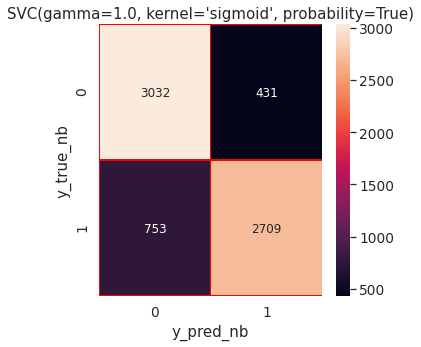

: f1=0.821 auc=0.907


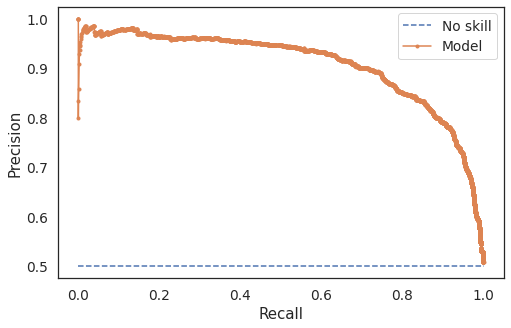

In [38]:
X_test, y_test = create_best('over', [4150], df_eda, svc, 'tfidf')

<a href='#toc'>Back to table of content</a>

### <a id='mp'>Make prediction</a>

In [39]:
df_eda.head(3)

,class,text,processed
0,0,go until jurong point crazy available only in ...,go jurong point crazi avail bugi n great world...
1,0,go until jurong point crazy available only in ...,go jurong point crazi avail bugi n great world...
2,0,go until jurong point crazy available only in ...,go jurong point crazi avail bugi n great world...


In [40]:
vectorizer = TfidfVectorizer(max_features=4150, ngram_range=(1,2))
# vectorizer = feature_extraction.text.CountVectorizer(max_features=10000, ngram_range=(1,2))
vectorizer.fit_transform(df_eda['processed'])

<16120x4150 sparse matrix of type '<class 'numpy.float64'>'
	with 157940 stored elements in Compressed Sparse Row format>

In [41]:
# test text with first 2 entries as spam and last 2 ham
test_text = ["free entry", \
             "no obligation",\
            'before it is gone, call now']
integers = vectorizer.transform(test_text)

In [42]:
for i in range(0,3):
    if svc.predict(integers[i]) == 1:
        print ("Spam")
    else:
        print("Ham")

Ham
Ham
Ham


### <a id='sm'>Save model</a>

In [43]:
# save the mnb model
filename = 'svc.sav'
# mnb is the just the name of instance of multinominal naive base model
pickle.dump(svc, open(filename, 'wb')) 

In [44]:
# load the saved model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8290252707581227


<a href='#toc'>Back to table of content</a>

BERT name mapper

In [45]:
# create a BERT name mapper
map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

In [46]:
map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

<a href='#toc'>Back to table of content</a>

### <a id='bert'>BERT</a>

In [47]:
import tensorflow as tf
check_gpu = len( tf.config.list_physical_devices('GPU') )>0
print("GPU is", "available" if check_gpu else "NOT AVAILABLE")

GPU is NOT AVAILABLE


In [48]:
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text # for vectorizing words
# from official.nlp import optimization  # to create AdamW optimizer # installation not successful

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

Choosing one of the many BERT models

In [49]:
# select the BERT model

# bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8'  #@param ["bert_en_uncased_L-12_H-768_A-12", "bert_en_cased_L-12_H-768_A-12", "bert_multi_cased_L-12_H-768_A-12", "small_bert/bert_en_uncased_L-2_H-128_A-2", "small_bert/bert_en_uncased_L-2_H-256_A-4", "small_bert/bert_en_uncased_L-2_H-512_A-8", "small_bert/bert_en_uncased_L-2_H-768_A-12", "small_bert/bert_en_uncased_L-4_H-128_A-2", "small_bert/bert_en_uncased_L-4_H-256_A-4", "small_bert/bert_en_uncased_L-4_H-512_A-8", "small_bert/bert_en_uncased_L-4_H-768_A-12", "small_bert/bert_en_uncased_L-6_H-128_A-2", "small_bert/bert_en_uncased_L-6_H-256_A-4", "small_bert/bert_en_uncased_L-6_H-512_A-8", "small_bert/bert_en_uncased_L-6_H-768_A-12", "small_bert/bert_en_uncased_L-8_H-128_A-2", "small_bert/bert_en_uncased_L-8_H-256_A-4", "small_bert/bert_en_uncased_L-8_H-512_A-8", "small_bert/bert_en_uncased_L-8_H-768_A-12", "small_bert/bert_en_uncased_L-10_H-128_A-2", "small_bert/bert_en_uncased_L-10_H-256_A-4", "small_bert/bert_en_uncased_L-10_H-512_A-8", "small_bert/bert_en_uncased_L-10_H-768_A-12", "small_bert/bert_en_uncased_L-12_H-128_A-2", "small_bert/bert_en_uncased_L-12_H-256_A-4", "small_bert/bert_en_uncased_L-12_H-512_A-8", "small_bert/bert_en_uncased_L-12_H-768_A-12", "albert_en_base", "electra_small", "electra_base", "experts_pubmed", "experts_wiki_books", "talking-heads_base"]
bert_model_name = 'small_bert/bert_en_uncased_L-2_H-128_A-2'  #@param ["bert_en_uncased_L-12_H-768_A-12", "bert_en_cased_L-12_H-768_A-12", "bert_multi_cased_L-12_H-768_A-12", "small_bert/bert_en_uncased_L-2_H-128_A-2", "small_bert/bert_en_uncased_L-2_H-256_A-4", "small_bert/bert_en_uncased_L-2_H-512_A-8", "small_bert/bert_en_uncased_L-2_H-768_A-12", "small_bert/bert_en_uncased_L-4_H-128_A-2", "small_bert/bert_en_uncased_L-4_H-256_A-4", "small_bert/bert_en_uncased_L-4_H-512_A-8", "small_bert/bert_en_uncased_L-4_H-768_A-12", "small_bert/bert_en_uncased_L-6_H-128_A-2", "small_bert/bert_en_uncased_L-6_H-256_A-4", "small_bert/bert_en_uncased_L-6_H-512_A-8", "small_bert/bert_en_uncased_L-6_H-768_A-12", "small_bert/bert_en_uncased_L-8_H-128_A-2", "small_bert/bert_en_uncased_L-8_H-256_A-4", "small_bert/bert_en_uncased_L-8_H-512_A-8", "small_bert/bert_en_uncased_L-8_H-768_A-12", "small_bert/bert_en_uncased_L-10_H-128_A-2", "small_bert/bert_en_uncased_L-10_H-256_A-4", "small_bert/bert_en_uncased_L-10_H-512_A-8", "small_bert/bert_en_uncased_L-10_H-768_A-12", "small_bert/bert_en_uncased_L-12_H-128_A-2", "small_bert/bert_en_uncased_L-12_H-256_A-4", "small_bert/bert_en_uncased_L-12_H-512_A-8", "small_bert/bert_en_uncased_L-12_H-768_A-12", "albert_en_base", "electra_small", "electra_base", "experts_pubmed", "experts_wiki_books", "talking-heads_base"]

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [50]:
# create an instance of a BERT preprocessing model
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

# encode sample text
text_test = ['Hello world!']
text_preprocessed = bert_preprocess_model(text_test)

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

<a href='#toc'>Back to table of content</a>

### <a id='dbm'>Define the BERT model</a>

In [51]:
def build_classifier_model():
    
    # BERT layers, which are quite standard regardless of the task
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text') 
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing') 
    encoder_inputs = preprocessing_layer(text_input) # encode text
    encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder') 
    outputs = encoder(encoder_inputs) # create the embedding
    net = outputs['pooled_output'] # this represents the embedding for all the text on the entire df

    # Neural network layer   
    # Add a dropout to decrease Overfitting; During training, constantly change which neuron is available
    l = tf.keras.layers.Dropout(0.1, name='dropout')(net)     
    # Add a Dense layer of 1 (1, ) because it's telling whether it is spam or not
    final = tf.keras.layers.Dense(1, activation = 'sigmoid', name = 'output')(l)

    return tf.keras.Model(text_input, final)

In [52]:
# create an instance of the model and show its structure
classifier_model = build_classifier_model()
classifier_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 preprocessing (KerasLayer)     {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                      

In [54]:
# Other metrics wanted
metrics = [tf.metrics.BinaryAccuracy(name = 'accuracy'),
          tf.metrics.Precision(name='precision'),
          tf.metrics.Recall(name='Recall')]

In [55]:
# compile the model
classifier_model.compile(optimizer='adam', 
                         loss='binary_crossentropy', # for binary classification
                         metrics=metrics)

In [56]:
from tensorflow.keras.callbacks import EarlyStopping
# add earlystopping, which happens before fitting the model
# "patience" decides how far in training time to go to see if the error of two lines converge to a low pt)
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
        verbose=1, mode='auto', restore_best_weights=True)

<a href='#toc'>Back to table of content</a>

### <a id='ceda'>Compare BERT models with or without EDA</a>

In [58]:
def main_BERT(X_train, X_test, y_train, y_test):
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix, classification_report
    from matplotlib import pyplot as plt
    import seaborn as sn
    import numpy as np

    # fit the model
    start = time.time()
    history = classifier_model.fit(X_train, y_train, validation_split=0.20, batch_size=32, callbacks=[monitor],epochs = 30)
    end = time.time()
    print("-----------------------------------")
    print("--- %s seconds ---" % (end - start))
    print("-----------------------------------")

    # training history plot
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    y_predicted = classifier_model.predict(X_test)
    y_predicted = y_predicted.flatten()
    y_predicted = np.where(y_predicted > 0.5, 1, 0)

    cm = confusion_matrix(y_test, y_predicted)
    sn.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # classification report
    print(classification_report(y_test, y_predicted))

In [59]:
# create a df without EDA 
# to decrease processing time, undersampling the abundant class
sampled_df, y = under_over_sample(df, df['class'], 'under')
X_train, X_test, y_train, y_test = split(sampled_df['processed'], y, 0.25)

X_rus shape is:  (1494, 4)
y_rus shape is:  (1494,)
X shape:  (1494,)
X_train shape:  (1120,)
X_test shape:  (374,)
y_train shape:  (1120,)
y_test shape:  (374,) 



Epoch 1/30
28/28 [==============================] - 23s 685ms/step - loss: 0.2548 - accuracy: 0.9018 - precision: 0.9161 - Recall: 0.8782 - val_loss: 0.1410 - val_accuracy: 0.9598 - val_precision: 0.9531 - val_Recall: 0.9760
Epoch 2/30
28/28 [==============================] - 16s 589ms/step - loss: 0.0912 - accuracy: 0.9766 - precision: 0.9905 - Recall: 0.9609 - val_loss: 0.1063 - val_accuracy: 0.9643 - val_precision: 0.9606 - val_Recall: 0.9760
Epoch 3/30
28/28 [==============================] - 16s 586ms/step - loss: 0.0423 - accuracy: 0.9888 - precision: 0.9930 - Recall: 0.9839 - val_loss: 0.1087 - val_accuracy: 0.9688 - val_precision: 0.9917 - val_Recall: 0.9520
Epoch 4/30
28/28 [==============================] - 17s 600ms/step - loss: 0.0135 - accuracy: 0.9967 - precision: 0.9977 - Recall: 0.9954 - val_loss: 0.0813 - val_accuracy: 0.9643 - val_precision: 0.9606 - val_Recall: 0.9760
Epoch 5/30
28/28 [==============================] - 17s 598ms/step - loss: 0.0279 - accuracy: 0.9933

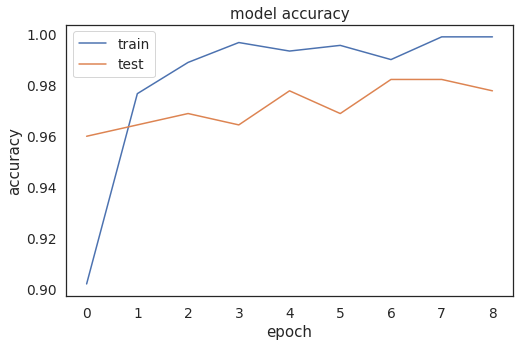

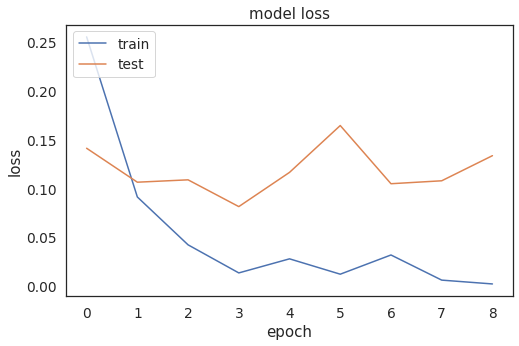

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       187
           1       0.97      0.98      0.98       187

    accuracy                           0.98       374
   macro avg       0.98      0.98      0.98       374
weighted avg       0.98      0.98      0.98       374



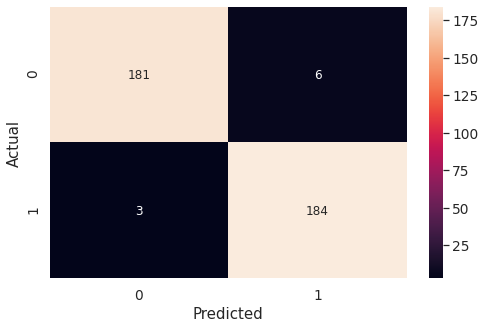

In [60]:
main_BERT(X_train, X_test, y_train, y_test)

In [61]:
# create a df with EDA and undersampling the abundant class
sampled_df, y = under_over_sample(df_eda, df_eda['class'], 'under')
X_train, X_test, y_train, y_test = split(sampled_df['processed'], y, 0.25)

X_rus shape is:  (4540, 3)
y_rus shape is:  (4540,)
X shape:  (4540,)
X_train shape:  (3405,)
X_test shape:  (1135,)
y_train shape:  (3405,)
y_test shape:  (1135,) 



<a href='#toc'>Back to table of content</a>

### <a id='pberteda'>Performance of BERT with EDA. f1 = .99 </a>

Epoch 1/30
86/86 [==============================] - 52s 586ms/step - loss: 0.1108 - accuracy: 0.9637 - precision: 0.9644 - Recall: 0.9637 - val_loss: 0.0268 - val_accuracy: 0.9941 - val_precision: 0.9878 - val_Recall: 1.0000
Epoch 2/30
86/86 [==============================] - 49s 569ms/step - loss: 0.0469 - accuracy: 0.9864 - precision: 0.9876 - Recall: 0.9855 - val_loss: 0.0409 - val_accuracy: 0.9941 - val_precision: 0.9908 - val_Recall: 0.9969
Epoch 3/30
86/86 [==============================] - 50s 579ms/step - loss: 0.0354 - accuracy: 0.9897 - precision: 0.9884 - Recall: 0.9913 - val_loss: 0.0272 - val_accuracy: 0.9956 - val_precision: 0.9909 - val_Recall: 1.0000
Epoch 4/30
86/86 [==============================] - 50s 580ms/step - loss: 0.0101 - accuracy: 0.9974 - precision: 0.9971 - Recall: 0.9978 - val_loss: 0.0304 - val_accuracy: 0.9927 - val_precision: 0.9848 - val_Recall: 1.0000
Epoch 5/30
86/86 [==============================] - 50s 583ms/step - loss: 0.0104 - accuracy: 0.9956

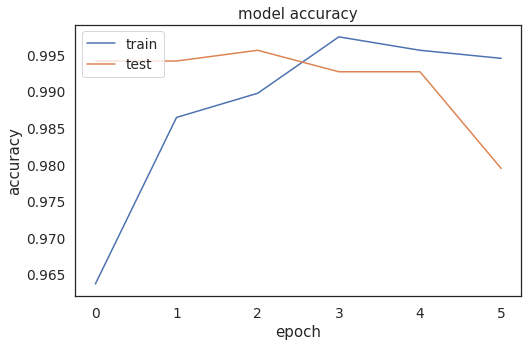

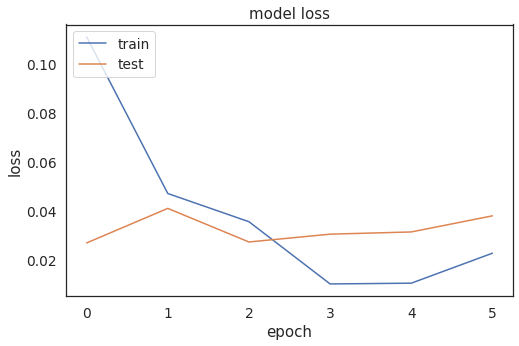

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       568
           1       0.99      1.00      0.99       567

    accuracy                           0.99      1135
   macro avg       0.99      0.99      0.99      1135
weighted avg       0.99      0.99      0.99      1135



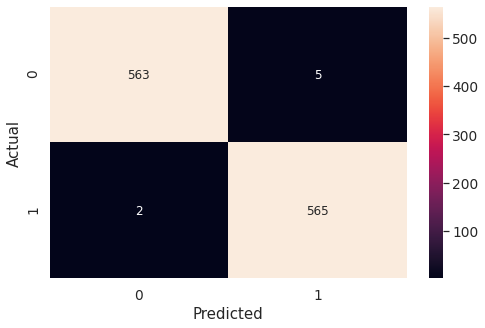

In [62]:
main_BERT(X_train, X_test, y_train, y_test)

### Save the model and make prediction

In [63]:
dataset_name = 'spam_ham'
saved_model_path = './{}_bert'.format(dataset_name.replace('/', '_'))

classifier_model.save(saved_model_path, include_optimizer=False)
# classifier_model.save(saved_model_path, include_optimizer=False)

In [64]:
# load the model
reloaded_model = tf.saved_model.load(saved_model_path)

In [65]:
reviews = [
    'free stuff, must go soon',
    'what time is our meeting today',
    'call reply claim free prize now',
    'alright. talk soon'
]
classifier_model.predict(reviews)

array([[0.00434488],
       [0.00114769],
       [0.9997084 ],
       [0.00123551]], dtype=float32)

<a href='#toc'>Back to table of content</a>